In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('../file/train.csv')
data_test = pd.read_csv('../file/test.csv')

In [3]:
data_test1 = data_test['ID']

In [4]:
data_train.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [5]:
#Removing gender and id columns
data_train = data_train.drop(['ID','Gender'],axis=1)
data_test = data_test.drop(['ID','Gender'],axis=1)

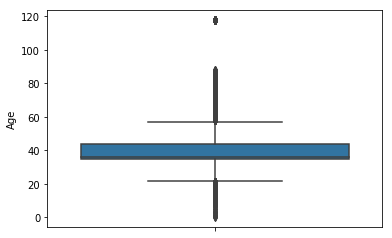

<Figure size 720x720 with 0 Axes>

In [6]:
sns.boxplot(data_train['Age'],orient='v')
plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize']=(10,10)


<Figure size 720x720 with 0 Axes>

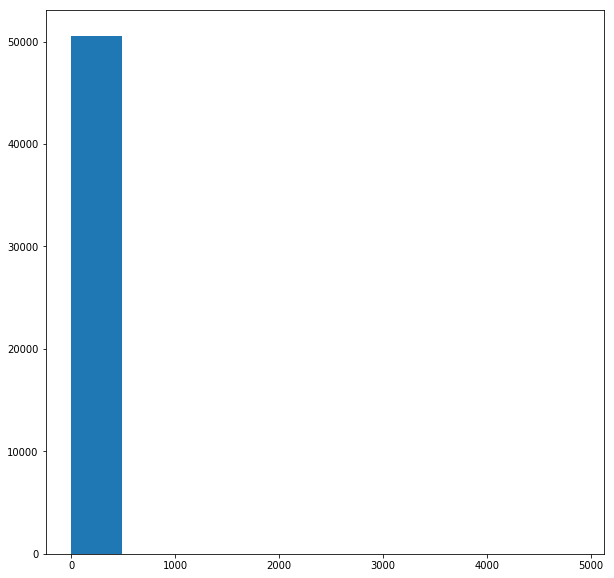

<Figure size 720x720 with 0 Axes>

In [7]:
plt.hist(data_train['Duration'])
plt.figure(figsize=(10,10))


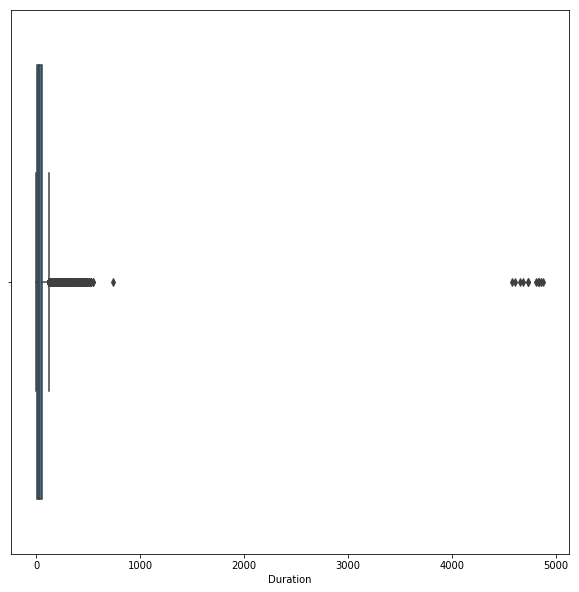

<Figure size 720x720 with 0 Axes>

In [8]:
sns.boxplot(data_train['Duration'])
plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize']=(15,5)

In [9]:
data_train.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


In [10]:
data_train.loc[data_train['Age'] ==0, 'Age'] = 36
data_train.loc[data_train['Age'] > 100, 'Age'] = 36

In [11]:
data_train.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,38.723122
std,0.120180,101.434647,48.899683,19.91004,10.051320
min,0.000000,-2.000000,-389.000000,0.00000,1.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,42.000000
max,1.000000,4881.000000,810.000000,283.50000,88.000000


In [12]:
a = data_train.skew()
print(a)

Claim                    8.077216
Duration                22.872743
Net Sales                3.328243
Commision (in value)     4.078189
Age                      1.222872
dtype: float64


In [13]:
#replacing negative duration value with its mean
data_train.loc[data_train['Duration'] < 0, 'Duration'] = 49.425
data_train.loc[data_train['Duration'] > 4000, 'Duration'] = 49.425
data_train['Duration'].skew()

3.1729775992352653

In [14]:
#a = data_train.groupby(data_train['Agency Type'])['Claim'].value_counts()

In [15]:
#print('Percentage of Claims in Airlines: ', round(a[1]/(a[0] + a[1])*100,2))
#print('Percentage of Claims in Travel Agency: ', round(a[3]/(a[2] + a[3])*100,2))

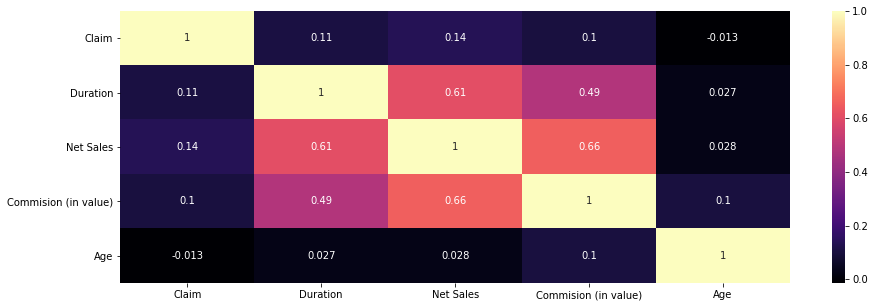

In [16]:
sns.heatmap(data_train.corr(),annot=True, cmap='magma')
plt.show()

In [17]:
data_train.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,48.406642,40.800977,9.83809,38.723122
std,0.120180,74.041596,48.899683,19.91004,10.051320
min,0.000000,0.000000,-389.000000,0.00000,1.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,42.000000
max,1.000000,740.000000,810.000000,283.50000,88.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaling_cols = ['Duration','Net Sales','Commision (in value)','Age']
for i in scaling_cols:
    data_train[i] = scaler.fit_transform(data_train[[i]])

In [19]:
data_train.skew()

Claim                   8.077216
Duration                3.172978
Net Sales               3.328243
Commision (in value)    4.078189
Age                     1.222872
dtype: float64

In [20]:
cols = ['Duration','Net Sales','Commision (in value)','Age']
for i in cols:
    data_train[i] = np.log1p(data_train[i])

In [21]:
b = data_train.skew()
print(b)

Claim                   8.077216
Duration                2.849983
Net Sales               2.916462
Commision (in value)    3.321431
Age                     0.929446
dtype: float64


In [22]:
pd.DataFrame({'Before removing skewness': a, 'After removing skewness': b})

,Before removing skewness,After removing skewness
Claim,8.077216,8.077216
Duration,22.872743,2.849983
Net Sales,3.328243,2.916462
Commision (in value),4.078189,3.321431
Age,1.222872,0.929446


In [23]:
X_cat = data_train.select_dtypes(include='object')
X_cont = data_train.select_dtypes(exclude='object')

In [24]:
X_cat = pd.get_dummies(X_cat)

In [25]:
train_df = pd.concat([X_cat,X_cont],axis=1,sort=False)
train_df.head()

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Claim,Duration,Net Sales,Commision (in value),Age
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.009415,0.280987,0.060961,0.296266
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.108733,0.323521,0.000000,0.338113
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.014755,0.293379,0.041051,0.615496
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.021391,0.293503,0.000000,0.304777
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.013423,0.290389,0.000000,0.279024


In [26]:
#Separating featrue and target
X = train_df.drop(['Claim'], axis=1)
y = train_df['Claim'].copy()

In [27]:
#from sklearn.decomposition import PCA 
#pca = PCA(n_components=15)
#X_pca = pca.fit_transform(X)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [29]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=42, ratio=1.0).fit_sample(X_train, y_train)

In [30]:
y_train.value_counts()


0    34868
1      519
Name: Claim, dtype: int64

In [31]:
y_test.value_counts()

0    14944
1      222
Name: Claim, dtype: int64

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, roc_auc_score, confusion_matrix, f1_score,recall_score

logreg = LogisticRegression(random_state=42)
logreg.fit(X_resampled, y_resampled)
y_pred_lr = logreg.predict(X_test)
score_lr = precision_score(y_test,y_pred_lr)
print(score_lr)
f1_lr = f1_score(y_test,y_pred_lr)
print(f1_lr)
print(confusion_matrix(y_test,y_pred_lr))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_lr).ravel()
print(tn, fp, fn, tp)
recall_lr = recall_score(y_test,y_pred_lr)
roc_lr = roc_auc_score(y_test,y_pred_lr)

0.048271922307912024
0.0907869997313994
[[11612  3332]
 [   53   169]]
11612 3332 53 169


In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled, y_resampled)
y_pred_dt = dt.predict(X_test)
score_dt = precision_score(y_test,y_pred_dt)
print(score_dt)
f1_dt = f1_score(y_test,y_pred_dt)
print(f1_dt)
recall_dt = recall_score(y_test,y_pred_dt)
roc_dt = roc_auc_score(y_test,y_pred_dt)

0.04905660377358491
0.06914893617021277


In [34]:
#Hyperparameter Tuning
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
'n_estimators': [10,11,12,13,14],
'max_depth' : [3,4,5,6],
'criterion' :['gini', 'entropy']
}
grid_search_model = GridSearchCV(rfc, param_grid=param_grid, cv=3)
grid_search_model.fit(X_train,y_train)

grid_search_model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 10}

In [49]:
rfc1 = RandomForestClassifier(random_state=42,criterion = 'gini',max_depth =3,n_estimators=10)
rfc1.fit(X_resampled, y_resampled)
y_pred_rf = rfc1.predict(X_test)
score_rf = precision_score(y_test,y_pred_rf)
print(score_rf)
f1_rf = f1_score(y_test,y_pred_rf)
print(f1_rf)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_rf).ravel()
print(tn, fp, fn, tp)
recall_rf = recall_score(y_test,y_pred_rf)
roc_rf = roc_auc_score(y_test,y_pred_rf)

0.053714684339030344
0.09970864357397215
12231 2713 68 154


In [50]:
Models = ['Logistic Regression','Decision Tree','Random Forest']
Precision_score = [score_lr, score_dt, score_rf]
F1_score = [f1_lr, f1_dt, f1_rf]
Recall_score = [recall_lr,recall_dt,recall_rf]
ROC_score = [roc_lr,roc_dt,roc_rf]
pd.DataFrame({'Models': Models, 'Precision Score': Precision_score,'Recall Score': Recall_score ,'F1 Score' : F1_score,'ROC score': ROC_score })

,Models,Precision Score,Recall Score,F1 Score,ROC score
0,Logistic Regression,0.048272,0.761261,0.090787,0.769148
1,Decision Tree,0.049057,0.117117,0.069149,0.541696
2,Random Forest,0.053715,0.693694,0.099709,0.756075


----------------------------

FOR TEST DATA

In [37]:
scaling_cols = ['Duration','Net Sales','Commision (in value)','Age']
for i in scaling_cols:
    data_test[i] = scaler.fit_transform(data_test[[i]])

In [38]:
X_cat_test = data_test.select_dtypes(include='object')
X_cont_test = data_test.select_dtypes(exclude='object')


In [39]:
X_cat_test = pd.get_dummies(X_cat_test)

In [40]:
cols1 = ['Duration','Net Sales','Commision (in value)','Age']
for i in cols1:
    X_cont_test[i] = np.log1p(X_cont_test[i])

In [41]:
test_df = pd.concat([X_cat_test,X_cont_test],axis=1,sort=False)
test_df.head()

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Duration,Net Sales,Commision (in value),Age
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.012097,0.358634,0.132157,0.331576
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.001031,0.336548,0.000000,0.179468
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0.014132,0.336548,0.000000,0.261707
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.008626,0.342586,0.000000,0.261707
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.003500,0.329712,0.000000,0.261707


In [42]:
y_pred_test = rfc1.predict(test_df)
df = pd.DataFrame({'Claim':np.array(y_pred_test)})

In [43]:
test_dataset = pd.concat([data_test1,df],axis=1,sort=False)
test_dataset.head()

,ID,Claim
0,25902,0
1,19535,0
2,43717,0
3,48271,0
4,52318,1


In [44]:
test_dataset['Claim'].value_counts()

0    9390
1    3271
Name: Claim, dtype: int64

In [45]:
# Submission CSV file
submit = test_dataset
submit.to_csv('Final submission3.csv', index = False)